In [ ]:
Name: Vedashree Bane 
Roll No.: 09
Grade: TE IT
Subject: DSBDL 

Assignment No.: Group C - 02
Develop a mini project in a group using different predictive models techniques to solve any real life
problem.

PROJECT TOPIC: IPL WINNER PREDICTION 

In [1]:
mkdir Project

In [2]:
cd Project

/content/Project


In [ ]:
#import packages
import numpy as np
import pandas as pd

In [ ]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [ ]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
match.shape

(756, 18)

In [ ]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
delivery.shape

(179078, 21)

In [ ]:
#for finding out the total runs in first inning 
total_score_df=delivery.groupby(["match_id","inning"]).sum()["total_runs"].reset_index()
total_score_df=total_score_df[total_score_df["inning"]==1]
print(total_score_df.head())

   match_id  inning  total_runs
0         1       1         207
2         2       1         184
4         3       1         183
6         4       1         163
8         5       1         157


<ipython-input-12-0c9cc5f0d4d8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df=delivery.groupby(["match_id","inning"]).sum()["total_runs"].reset_index()


In [ ]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [ ]:
#for merging our dataframe with match dataset
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [ ]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [ ]:
#for finding the teams in the match
match_df["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
#for renaming repeated teams and removing non existing teams
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [ ]:
#renaming
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [ ]:
#removing teams which are not present in the teams list above
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [ ]:
match_df.shape

(641, 20)

In [ ]:
match_df['dl_applied'].value_counts()

0    626
1     15
Name: dl_applied, dtype: int64

In [ ]:
#for removing The Duckworth Lewis i.e. rain affected matches
match_df = match_df[match_df['dl_applied'] == 0]

In [ ]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [ ]:
delivery_df = match_df.merge(delivery,on='match_id')

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
#for 2nd innning
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
delivery_df.shape

(72413, 24)

In [ ]:
#cumsum:cummulative sum
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

<ipython-input-29-79b21197ccaf>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']
<ipython-input-29-79b21197ccaf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']


In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,1,0,1,NaN,NaN,NaN,152
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,2,0,2,NaN,NaN,NaN,154
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,1,0,1,SR Watson,run out,KH Pandya,155
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,2,0,2,NaN,NaN,NaN,157


In [ ]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']+1

<ipython-input-31-444d78125c76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']+1


In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,207
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,205
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,1,0,1,NaN,NaN,NaN,152,1
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,2,0,2,NaN,NaN,NaN,154,-1
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,1,0,1,SR Watson,run out,KH Pandya,155,-2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,2,0,2,NaN,NaN,NaN,157,-4


In [ ]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

<ipython-input-33-7447ac93ecae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])


In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,201,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,1,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-1,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-2,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-4,1


In [ ]:
#for finding wickets
#fill the nan values with 0
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
#for replacing the players name with 1 and if it is 0 then keep as it is
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
#convert to int
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
#wickets after every ball in a match
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

<ipython-input-35-0fda164f00c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
<ipython-input-35-0fda164f00c5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
<ipython-input-35-0fda164f00c5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10


In [ ]:
delivery_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,1,4,5
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-1,3,5
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-2,2,4
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-4,1,4
149577,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,0,0,0,1,lbw,NaN,157,-4,0,3


In [ ]:
# crr = runs/overs
#current run rate
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

<ipython-input-37-c082bf74e8bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])


In [ ]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,NaN,NaN,1,207,119,10,6.0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,NaN,NaN,1,207,118,10,3.0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,NaN,NaN,1,207,117,10,2.0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,NaN,NaN,3,205,116,10,4.5
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,NaN,NaN,7,201,115,10,8.4


In [ ]:
#required run rate
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

<ipython-input-39-2bc93e4c4313>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']


In [ ]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,207,119,10,6.0,10.436975
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,207,118,10,3.0,10.525424
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,207,117,10,2.0,10.615385
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,205,116,10,4.5,10.603448
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,201,115,10,8.4,10.486957


In [ ]:
#for displaying result in the form of 0 and 1
#check for each row
#if batting == winner then 1 else 0
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [ ]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

<ipython-input-42-ea301901c09f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['result'] = delivery_df.apply(result,axis=1)


In [ ]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,207,119,10,6.0,10.436975,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,207,118,10,3.0,10.525424,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,207,117,10,2.0,10.615385,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,205,116,10,4.5,10.603448,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,201,115,10,8.4,10.486957,0


In [ ]:
delivery_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,NaN,NaN,152,1,4,5,7.862069,1.5,0
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,NaN,NaN,154,-1,3,5,7.897436,-2.0,0
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,run out,KH Pandya,155,-2,2,4,7.881356,-6.0,0
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,NaN,NaN,157,-4,1,4,7.915966,-24.0,0
149577,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,1,lbw,NaN,157,-4,0,3,7.850000,-inf,0


In [ ]:
delivery_df.sample(10)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
90257,473,Sharjah,Delhi Daredevils,125,2,Delhi Daredevils,Mumbai Indians,3,6,Q de Kock,...,0,NaN,NaN,14,112,102,10,4.666667,6.588235,1
106305,541,Mumbai,Mumbai Indians,157,2,Sunrisers Hyderabad,Mumbai Indians,11,5,RS Bopara,...,0,NaN,NaN,76,82,55,7,7.015385,8.945455,0
16480,101,Jaipur,Rajasthan Royals,197,2,Royal Challengers Bangalore,Rajasthan Royals,1,2,J Arunkumar,...,0,NaN,NaN,0,198,118,10,0.000000,10.067797,0
69760,370,Mumbai,Kolkata Knight Riders,140,2,Mumbai Indians,Kolkata Knight Riders,4,4,HH Gibbs,...,0,NaN,NaN,8,133,98,10,2.181818,8.142857,0
6751,55,Delhi,Royal Challengers Bangalore,161,2,Delhi Daredevils,Royal Challengers Bangalore,7,2,RR Pant,...,0,NaN,NaN,44,118,82,8,6.947368,8.634146,0
2067,15,Delhi,Delhi Daredevils,188,2,Kings XI Punjab,Delhi Daredevils,3,1,WP Saha,...,0,NaN,NaN,7,182,107,9,3.230769,10.205607,0
81807,433,Jaipur,Rajasthan Royals,154,2,Rajasthan Royals,Delhi Daredevils,6,1,AM Rahane,...,0,NaN,NaN,36,119,89,10,6.967742,8.022472,1
43772,217,Bangalore,Royal Challengers Bangalore,160,2,Royal Challengers Bangalore,Kolkata Knight Riders,17,1,LRPL Taylor,...,0,NaN,NaN,143,18,23,7,8.845361,4.695652,1
75624,400,Chandigarh,Kings XI Punjab,157,2,Kolkata Knight Riders,Kings XI Punjab,9,2,G Gambhir,...,0,NaN,NaN,68,90,70,8,8.160000,7.714286,0
121907,7895,Mohali,Kings XI Punjab,172,2,Kings XI Punjab,Delhi Daredevils,9,3,KK Nair,...,0,NaN,NaN,89,84,69,8,10.470588,7.304348,1


In [ ]:
#edited data
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [ ]:
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,10,207,6.0,10.436975,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,10,207,3.0,10.525424,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,10,207,2.0,10.615385,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205,116,10,207,4.5,10.603448,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201,115,10,207,8.4,10.486957,0


In [ ]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,10,207,6.000000,10.436975,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,10,207,3.000000,10.525424,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,10,207,2.000000,10.615385,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205,116,10,207,4.500000,10.603448,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201,115,10,207,8.400000,10.486957,0
...,...,...,...,...,...,...,...,...,...,...
149573,Chennai Super Kings,Mumbai Indians,Hyderabad,1,4,5,152,7.862069,1.500000,0
149574,Chennai Super Kings,Mumbai Indians,Hyderabad,-1,3,5,152,7.897436,-2.000000,0
149575,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,2,4,152,7.881356,-6.000000,0
149576,Chennai Super Kings,Mumbai Indians,Hyderabad,-4,1,4,152,7.915966,-24.000000,0


In [ ]:
final_df.shape

(72413, 10)

In [ ]:
#for shuffling
final_df = final_df.sample(final_df.shape[0])

In [ ]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
4009,Kings XI Punjab,Sunrisers Hyderabad,Chandigarh,66,29,5,207,9.362637,13.655172,0
146608,Mumbai Indians,Kolkata Knight Riders,Kolkata,125,46,6,241,9.486486,16.304348,0
40075,Chennai Super Kings,Royal Challengers Bangalore,Chennai,81,66,9,161,9.000000,7.363636,1
108111,Rajasthan Royals,Mumbai Indians,Mumbai,33,16,7,187,8.942308,12.375000,0
36188,Kings XI Punjab,Deccan Chargers,Cuttack,66,22,3,170,6.428571,18.000000,0
...,...,...,...,...,...,...,...,...,...,...
69834,Mumbai Indians,Kolkata Knight Riders,Mumbai,52,25,6,140,5.621053,12.480000,0
121721,Chennai Super Kings,Mumbai Indians,Mumbai,24,12,2,169,8.111111,12.000000,1
14537,Kings XI Punjab,Chennai Super Kings,Chennai,29,9,4,181,8.270270,19.333333,0
148824,Mumbai Indians,Chennai Super Kings,Chennai,12,23,6,136,7.731959,3.130435,1


In [ ]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
136596,Kings XI Punjab,Kolkata Knight Riders,Kolkata,198,100,9,223,7.8,11.88,0


In [ ]:
final_df.isnull().sum()

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
wickets           0
total_runs_x      0
crr               0
rrr               5
result            0
dtype: int64

In [ ]:
final_df.dropna(inplace=True)

In [ ]:
final_df = final_df[final_df['balls_left'] != 0]

In [ ]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
56169,Delhi Daredevils,Kings XI Punjab,Dharamsala,110,66,9,170,6.777778,10.000000
77529,Chennai Super Kings,Rajasthan Royals,Chennai,127,83,9,185,9.567568,9.180723
104527,Rajasthan Royals,Chennai Super Kings,Ahmedabad,156,114,10,156,1.000000,8.210526
13571,Chennai Super Kings,Delhi Daredevils,Delhi,125,82,9,187,9.947368,9.146341
49658,Royal Challengers Bangalore,Deccan Chargers,Hyderabad,134,68,6,175,4.846154,11.823529
...,...,...,...,...,...,...,...,...,...
143971,Rajasthan Royals,Mumbai Indians,Jaipur,39,31,7,171,8.966292,7.548387
97432,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,2,3,7,160,8.153846,4.000000
77049,Royal Challengers Bangalore,Rajasthan Royals,Bangalore,87,96,10,117,7.750000,5.437500
60647,Rajasthan Royals,Mumbai Indians,Mumbai,51,21,5,197,8.909091,14.571429


In [ ]:
X_train.describe()

,runs_left,balls_left,wickets,total_runs_x,crr,rrr
count,57073.000000,57073.000000,57073.000000,57073.000000,57073.000000,57073.000000
mean,93.862615,62.982847,7.554203,165.875072,7.450307,10.583430
std,50.007850,33.252384,2.124030,29.283943,2.279740,14.033754
min,-15.000000,-2.000000,0.000000,65.000000,0.000000,-468.000000
25%,54.000000,35.000000,6.000000,147.000000,6.263736,7.278689
50%,93.000000,64.000000,8.000000,165.000000,7.500000,9.000000
75%,131.000000,92.000000,9.000000,185.000000,8.695652,11.032258
max,250.000000,119.000000,10.000000,250.000000,36.000000,684.000000


In [ ]:
'''
This estimator allows different columns or column subsets of the input to be transformed 
separately and the features generated by each transformer will be concatenated to form a single feature space.
'''
'''Specifies a methodology to use to drop one of the categories per feature. This is useful in situations where perfectly collinear 
features cause problems, such as when feeding the resulting data into an unregularized linear regression model
'''
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
#liblinear : a linear classifier for data with millions of instances and features
#used to find the winning probability of each teams in every stage using sigmoid function
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8006868035601654

In [ ]:
'''pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])'''

"pipe = Pipeline(steps=[\n    ('step1',trf),\n    ('step2',RandomForestClassifier())\n])"

In [ ]:
#pipe.fit(X_train,y_train)

In [ ]:
#y_pred = pipe.predict(X_test)

In [ ]:
'''from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)'''

'from sklearn.metrics import accuracy_score\naccuracy_score(y_test,y_pred)'

In [ ]:
#logistic regression gives more suitable outcomes and probabilities
pipe.predict_proba(X_test)[10]

array([0.0585313, 0.9414687])

In [ ]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

In [ ]:
#for calculating the winning probability of entire match
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [ ]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,3,0,55.8,44.2
10467,2,8,0,50.3,49.7
10473,3,1,0,57.0,43.0
10479,4,7,1,68.8,31.2
10485,5,12,0,58.6,41.4
10491,6,13,0,46.2,53.8
10497,7,9,0,40.2,59.8
10505,8,15,0,26.6,73.4
10511,9,7,0,24.4,75.6
10518,10,17,0,13.3,86.7


Text(0.5, 1.0, 'Target-178')

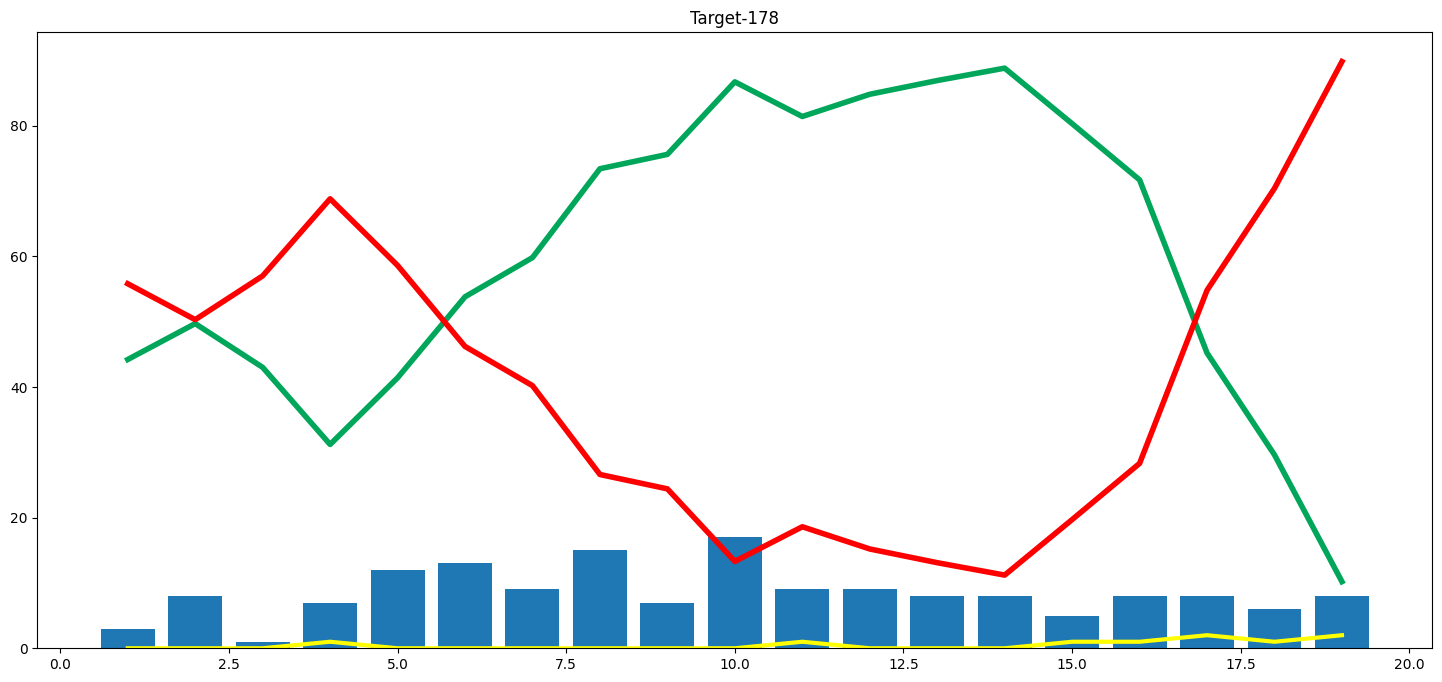

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))
#blue bar shows how many runs were scored in every over
#yellow curve show wickets in every over
#green curve show winning probability
#red curve show losing probability

In [ ]:
delivery_df.sample(74)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
126801,7917,Bengaluru,Chennai Super Kings,213,2,Chennai Super Kings,Royal Challengers Bangalore,18,4,MS Dhoni,...,0,NaN,NaN,178,36,14,6,10.075472,15.428571,1
105285,536,Ahmedabad,Kings XI Punjab,191,2,Kings XI Punjab,Rajasthan Royals,5,3,SE Marsh,...,0,NaN,NaN,27,165,93,9,6.000000,10.645161,1
79010,417,Mumbai,Mumbai Indians,194,2,Royal Challengers Bangalore,Mumbai Indians,12,4,SS Tiwary,...,0,NaN,NaN,77,118,50,5,6.600000,14.160000,0
65639,347,Chennai,Kolkata Knight Riders,139,2,Kolkata Knight Riders,Chennai Super Kings,2,1,G Gambhir,...,0,NaN,NaN,7,133,113,10,6.000000,7.061947,1
30881,164,Johannesburg,Kings XI Punjab,134,2,Deccan Chargers,Kings XI Punjab,20,2,RG Sharma,...,0,NaN,NaN,130,5,4,4,6.724138,7.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84213,446,Chennai,Chennai Super Kings,168,2,Delhi Daredevils,Chennai Super Kings,7,4,DA Warner,...,0,NaN,NaN,49,120,80,7,7.350000,9.000000,0
104618,533,Ahmedabad,Rajasthan Royals,156,2,Rajasthan Royals,Chennai Super Kings,16,6,SR Watson,...,0,NaN,NaN,144,13,24,10,9.000000,3.250000,1
107635,547,Chennai,Chennai Super Kings,134,2,Kolkata Knight Riders,Chennai Super Kings,16,2,YK Pathan,...,1,bowled,NaN,91,44,28,5,5.934783,9.428571,0
46092,227,Kolkata,Kolkata Knight Riders,132,2,Kolkata Knight Riders,Rajasthan Royals,7,1,SC Ganguly,...,0,NaN,NaN,42,91,83,8,6.810811,6.578313,1
